# Livrables

Ce notebook contient les étapes suivantes: 

    -Représentation d'une courbe dans un plan 2D avec un grid. 
    -Calcul de la pente de la trajectoire les grids.
    -Determination de la direction de la courbe dans chaque cellule.
    -Conversion de la trajectoire en une chaine de caractère.

### Contexte: 

Pour chaque direction on affecte une chaine de caractère. Pour simplifier, mais aussi pour diminuer les erreurs, on prend en considération 8 directions dans un plan 2D. En affectant à chaque direction une lettre : [A,B,C,D,E,F,G,H]

## Representation d'une courbe dans un plan 2D grillé: 

Nous allons représenter d'abord une trajectoire simple par les points x et y sous forme des array en utilisant des grilles 

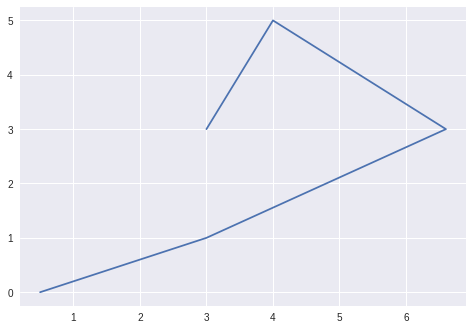

In [0]:
import matplotlib.pyplot as plt 
import numpy as np


x = np.array([0.5,3,6.6,4,3])
y = np.array([0,1,3,5,3])



plt.plot(x,y)
plt.grid(True)



Maintenant l'idée est de calculer la direction de la trajectoire dans chaque cellule, pour ensuite y affecter une chaine de caractère. 

Nous allons calculer maintenant les directions de de la trajectoire  en fonction des coordonnées 

In [0]:
for i in range(x.size-1): 
        a = (y[i+1]-y[i])/(x[i+1]-x[i])
        if x[i+1]-x[i]>0:
            if  y[i+1]-y[i]>0:
                 print("direction haute droite")
            else:
                    print("direction bas droite")
        else:
                if  y[i+1]-y[i]>0:
                    print("direction haute gauche")
                else:
                    print("direction bas gauche")

direction haute droite
direction haute droite
direction haute gauche
direction bas gauche


Mainetant avec les pentes ! 

direction haute 
pente :  0.4
 angle de pente :  0.3805063771123649
direction haute 
pente :  2.0
 angle de pente :  1.1071487177940904
direction haute 
pente :  1.0
 angle de pente :  0.7853981633974483
direction bas 
pente :  -1.4285714285714282
 angle de pente :  -0.9600703624056879


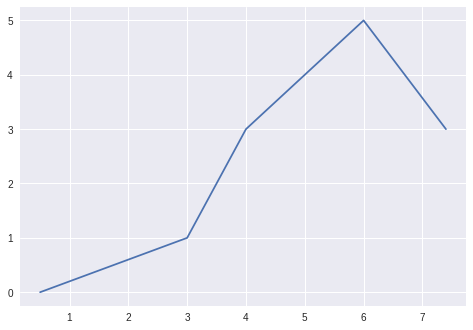

In [0]:
import math 


xt = np.array([0.5,3,4,6,7.4])
yt = np.array([0,1,3,5,3])
for i in range(xt.size-1): 
        a = (yt[i+1]-yt[i])/(xt[i+1]-xt[i])
        if xt[i+1]-xt[i]>0:
            if  yt[i+1]-yt[i]>0:
                print("direction haute ")
            else:
                print("direction bas ")
                   # print(math.atan())
        print('pente : ' ,+ a)
        print( ' angle de pente : ', math.atan(a)     )

#y = np.array[2,3,5]
#plt.xlim(x[0],x[-1])
#plt.ylim(y[0],y[-1])
#ax = plt.gca()
#minor_ticks = np.arange(5,8,3)
#ax.set_yticks(minor_ticks, minor=True)
#ax.yaxis.grid(which='minor')
plt.plot(xt,yt)
plt.grid(True)

### Application à une trajectoire

Pour la suite, on va travailler sur un un grid 16 x 16 pour unifier le contexte. Et puis on travaillera avec une transformation spatiale (temporelle plus tard) pour ramener une trajectoire simple quelconque en une trajectoire sur un plan 2D 16 x 16. 

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


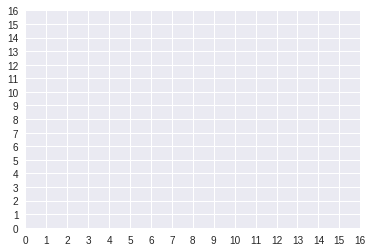

In [0]:
import matplotlib.pyplot as pp 
import numpy as np 

def resadjust(ax, xres=None, yres=None): 
    """ 
    Send in an axis and I fix the resolution as desired. 
    """ 

    if xres: 
      start, stop = ax.get_xlim() 
      ticks = np.arange(start, stop + xres, xres) 
      ax.set_xticks(ticks) 
    if yres: 
      start, stop = ax.get_ylim() 
      ticks = np.arange(start, stop + yres, yres) 
      ax.set_yticks(ticks) 

plt.plot()
plt.xlim([0, 16])
plt.ylim([0, 16])
ax=plt.axes()

resadjust(ax,1,1)
plt.grid(True)

plt.show()

En premier lieu, on va travailler avec une transformation linéaire simple. Etant donné une trajectoire de coordonnée X, Y (deux np array). Si max(X,Y) dépasse 16 (L'unité de travail que ça soit des mètres ou des Kilo mètres), alors on fait les opérations: 
\begin{equation}
\frac{16X}{max(X,Y)},
\frac{16Y}{max(X,Y)}
\end{equation}


In [0]:
def transform(X,Y):
  if max(X)>=16 or max(Y)>=16: 
    if max(X)>=max(Y):
      X=X*16/max(X)
      Y=Y*16/max(X)
      return X,Y
    if max(Y)>=max(X):
      X=X*16/max(Y)
      Y=Y*16/max(Y)
      return X,Y
  return X,Y

y = np.array([1, 13, 34, 26])
x = np.array([2, 3, 25, 17])

transform(x,y)

(array([ 0.94117647,  1.41176471, 11.76470588,  8.        ]),
 array([ 0.47058824,  6.11764706, 16.        , 12.23529412]))

### Interpolation avec python 

5.0


/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


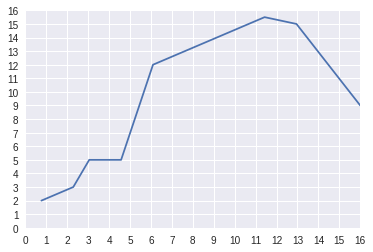

In [0]:
x = np.array([1,3, 4, 6, 8, 10,15 ,17, 21])
y = np.array([2, 3, 5, 5, 12, 13, 15.5, 15, 9])
print(np.interp(6, x, y))  #interpolation au point 5

plt.plot()
plt.xlim([0, 16])
plt.ylim([0, 16])
ax=plt.axes()

resadjust(ax,1,1)
plt.grid(True)

plt.plot(transform(x,y)[0],transform(x,y)[1])
plt.show()

### Calcul des pentes dans chaque case après la transofrmation: 

In [0]:
def calculPente(X,Y):
  L=[]
  pentes=[]
  angles=[]
  for i in range(16): 
    L.append(np.interp(i,X,Y))
  for i in range(15):
    pentes.append(L[i+1]-L[i])
    angles.append(math.atan(L[i+1]-L[i]))
  return pentes,angles

In [0]:
import math 
x = np.array([1,3, 4, 6, 8, 10,15 ,17, 21])
y = np.array([2, 3, 5, 5, 12, 14, 16, 1, 9])

print(calculPente(transform(x,y)[0],transform(x,y)[1]))

([0.15625, 0.65625, 2.0625, 0.125, 1.9687500000000009, 4.593749999999999, 1.625, 1.0124999999999993, 0.5250000000000004, 0.5250000000000004, 0.5250000000000004, -5.399999999999997, -9.250000000000004, 2.625, 2.6250000000000004], [0.15499674192394097, 0.5807563535676704, 1.1193432352423422, 0.12435499454676144, 1.100819688377889, 1.3564532371386109, 1.0191413442663497, 0.7916092636503143, 0.4834470015671993, 0.4834470015671993, 0.4834470015671993, -1.3876855095324123, -1.463106455962076, 1.2068173702852525, 1.2068173702852525])


### Conversion en chaine de caractères: 

Dans cette partie, on effectue la conversion en chaine de caractères de notre trajectoire.

In [0]:
def convert(list):
  # Converting integer list to string list 
  s = [str(i) for i in list] 
      
  # Join list items using join() 
  res = "".join(s)
      
  return(res)

def conversionStr(X,Y):
  L=[]
  for i in range(15):
    L.append(np.interp(i,X,Y))
  
  List=[0]*16
  for i in range(15):
    if 5 < calculPente(transform(x,y)[0],transform(x,y)[1])[0][i]: 
      L[i]='A'
    if 0 < calculPente(transform(x,y)[0],transform(x,y)[1])[0][i] < 5 and calculPente(transform(x,y)[0],transform(x,y)[1])[1][i] > 0:
      L[i]='B'
    if calculPente(transform(x,y)[0],transform(x,y)[1])[0][i] == 0 and calculPente(transform(x,y)[0],transform(x,y)[1])[0][i]> 0:
      L[i]='C'
    if -5 <calculPente(transform(x,y)[0],transform(x,y)[1])[0][i] < 0  and calculPente(transform(x,y)[0],transform(x,y)[1])[0][i] > 0: 
      L[i]='D'
    if calculPente(transform(x,y)[0],transform(x,y)[1])[0][i] <-5 : 
      L[i]='E'
    if 0 < calculPente(transform(x,y)[0],transform(x,y)[1])[0][i] < 5 and calculPente(transform(x,y)[0],transform(x,y)[1])[0][i] <0 :
      L[i]='F'
    if calculPente(transform(x,y)[0],transform(x,y)[1])[0][i] == 0 and calculPente(transform(x,y)[0],transform(x,y)[1])[0][i] <0 :
      L[i]='G'
    if -5 <calculPente(transform(x,y)[0],transform(x,y)[1])[0][i] < 0  calculPente(transform(x,y)[0],transform(x,y)[1])[0][i] <0 : 
      L[i]='H'
  return convert(L)

BBBBBBBBBBBEEBB


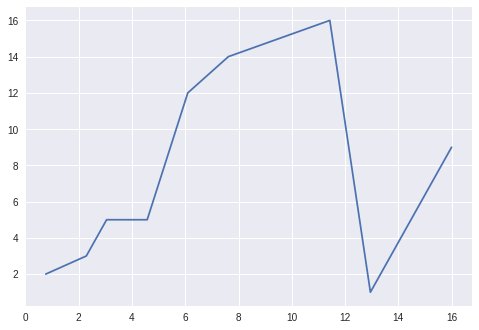

In [0]:
print(conversionStr(x,y))
plt.plot(transform(x,y)[0],transform(x,y)[1])
plt.show()

### L'algorithme Levenstein: 

Après avoir transformé la trajectoire en chaine de caractères, il est maintenant nécessaires de déployer l'algorithme de Levenstein pour comparer deux chaines de caractères, et puis de trouver les similarités. 

In [0]:
def levenshtein(s1, s2):
    if len(s1) < len(s2):
        return levenshtein(s2, s1)

    # len(s1) >= len(s2)
    if len(s2) == 0:
        return len(s1)

    previous_row = range(len(s2) + 1)
    for i, c1 in enumerate(s1):
        current_row = [i + 1]
        for j, c2 in enumerate(s2):
            insertions = previous_row[j + 1] + 1 
            deletions = current_row[j] + 1
            substitutions = previous_row[j] + (c1 != c2)
            current_row.append(min(insertions, deletions, substitutions))
        previous_row = current_row
    
    return previous_row[-1]

On teste sur deux chaines de caractères: 

In [0]:
s1= 'ADFHRT'
s2= 'BCDRTG'

levenshtein(s1,s2)



5

Il faut donc faire 5 opérations pour transformer s1 en s2.

In [0]:
print(levenshtein('DBAB','BCDAD'))

print(levenshtein('BCDAD','BADEB'))

4
3


### Levenstein appliqué à un jeu de donnée: 

On génére un jeu de donnée artificiel, et on classe les similarités avec une trajectoire primaire. 

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


(array([ 0.59092245,  3.13353975,  3.98186797,  9.91217411, 10.33672149,
       12.03086235]), array([ 7.5284148 ,  3.71674185,  2.02259675,  4.14115794, 11.76493158,
       16.        ]))


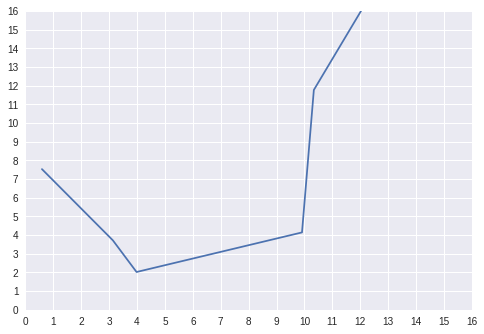

In [0]:
traj_A = np.array([[1.39534, 17.77678],[7.3992 , 8.77631],[9.40235, 4.77594],[23.40553, 9.77848],
                   [24.40801, 27.78043],[28.40837, 37.78066]])

traj_B = np.array([[1.39534, 1.77678],[7.3992 , 3.77631],[9.40235, 15.77594],[23.40553, 9.77848],
                   [24.40801, 4.78043],[28.40837, 13.78066]])

traj_C = np.array([[1.39534, 5.77678],[6.3992 , 15.77631],[8.40235, 15.77594],[16.40553, 8.77848],
                   [16.40801, 12.78043],[18.40837, 9.78066]])

traj_list = [traj_A, traj_B, traj_C]

LA1=np.array([traj_A[i][0] for i in range(len(traj_A))])
LA2=np.array([traj_A[i][1] for i in range(len(traj_A))])

LB1=np.array([traj_B[i][0] for i in range(len(traj_B))])
LB2=np.array([traj_B[i][1] for i in range(len(traj_B))])

LC1=np.array([traj_C[i][0] for i in range(len(traj_C))])
LC2=np.array([traj_C[i][1] for i in range(len(traj_C))])

plt.xlim([0, 16])
plt.ylim([0, 16])
ax=plt.axes()

resadjust(ax,1,1)
plt.grid(True)

print(transform(LA1,LA2))
plt.plot(transform(LA1,LA2)[0],transform(LA1,LA2)[1])
plt.show()
#Traj_A


/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


(array([ 0.78587543,  4.16733519,  5.2955379 , 13.18232901, 13.74694007,
       16.        ]), array([ 1.77678,  3.77631, 15.77594,  9.77848,  4.78043, 13.78066]))


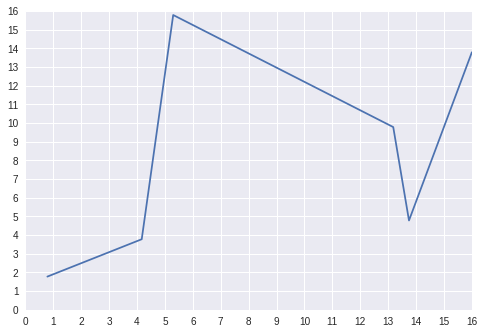

In [0]:
plt.xlim([0, 16])
plt.ylim([0, 16])
ax=plt.axes()

resadjust(ax,1,1)
plt.grid(True)

print(transform(LB1,LB2))
plt.plot(transform(LB1,LB2)[0],transform(LB1,LB2)[1])
plt.show()

 #Traj_B

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


(array([ 1.21278744,  5.56199164,  7.3030692 , 14.25919188, 14.26134742,
       16.        ]), array([ 5.77678, 15.77631, 15.77594,  8.77848, 12.78043,  9.78066]))


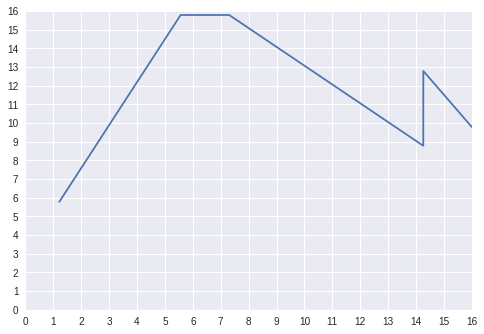

In [0]:
plt.xlim([0, 16])
plt.ylim([0, 16])
ax=plt.axes()

resadjust(ax,1,1)
plt.grid(True)

print(transform(LC1,LC2))
plt.plot(transform(LC1,LC2)[0],transform(LC1,LC2)[1])
plt.show()

#Traj_C

In [0]:
print(conversionStr(LA1,LA2))

print(conversionStr(LB1,LB2))

print(conversionStr(LC1,LC2))


BBBBBBBBBBBEEBB
BBBBBBBBBBBEEBB
BBBBBBBBBBBEEBB


In [0]:
levenshtein(conversionStr(LA1,LA2), conversionStr(x,y))

0